In [103]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [105]:
house_df = pd.read_csv('/content/Housing.csv')

In [106]:
house_df.shape

(545, 13)

In [107]:
house_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [108]:
house_df.drop_duplicates(inplace=True)

In [109]:
house_df.shape

(545, 13)

In [110]:
house_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [116]:
house_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(house_df[['price']])

SimpleImputer()

In [119]:
imputer.statistics_

array([4766729.24770642])

In [120]:
house_df['price'] = imputer.transform(house_df[['price']])

In [121]:
house_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [122]:
house_df = house_df.fillna(0)

In [123]:
house_df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [124]:
house_df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

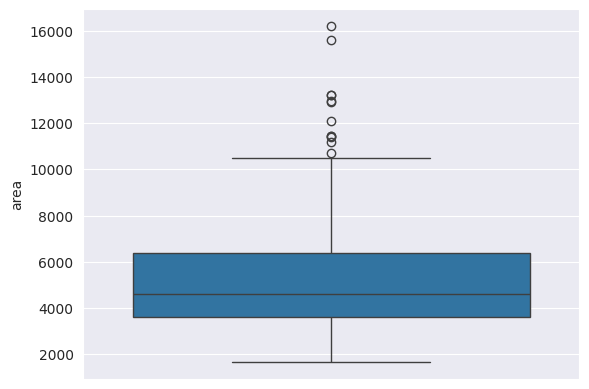

In [127]:
sns.set_style('darkgrid')
sns.boxplot(house_df, y = 'area');

In [129]:
import numpy as np
Q1 = np.percentile(house_df['area'], 25, interpolation = 'midpoint')
Q3 = np.percentile(house_df['area'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

In [130]:
lowerBound = Q1 - 1.5 * IQR
upperBound = Q1 + 1.5 * IQR
df = house_df[(house_df.area < upperBound) & (house_df.area > lowerBound)]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000.0,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
9,9800000.0,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             485 non-null    float64
 1   area              485 non-null    int64  
 2   bedrooms          485 non-null    int64  
 3   bathrooms         485 non-null    int64  
 4   stories           485 non-null    int64  
 5   mainroad          485 non-null    object 
 6   guestroom         485 non-null    object 
 7   basement          485 non-null    object 
 8   hotwaterheating   485 non-null    object 
 9   airconditioning   485 non-null    object 
 10  parking           485 non-null    int64  
 11  prefarea          485 non-null    object 
 12  furnishingstatus  485 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 53.0+ KB


In [135]:
unique_values = df['mainroad'].unique()
print(unique_values)

['yes' 'no']


In [136]:
cat_cols = df.select_dtypes('object').columns.tolist()

In [137]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [138]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse= False, handle_unknown='ignore')
encoder.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [139]:
encoded_cols = encoder.get_feature_names_out(cat_cols)
encoded_cols

array(['mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype=object)

In [140]:
df[encoded_cols] = encoder.transform(df[cat_cols])

In [141]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,yes,no,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,12215000.0,7500,4,2,2,yes,no,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000.0,7420,4,1,2,yes,yes,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,10850000.0,7500,3,3,1,yes,no,yes,no,yes,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,9800000.0,5750,3,2,4,yes,yes,no,no,yes,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,yes,no,yes,no,no,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150.0,2400,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000.0,3620,2,1,1,yes,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000.0,2910,3,1,1,no,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [142]:
df.drop(columns=cat_cols, inplace=True)
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000.0,7420,4,2,3,2,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,12215000.0,7500,4,2,2,3,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000.0,7420,4,1,2,2,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,10850000.0,7500,3,3,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,9800000.0,5750,3,2,4,1,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000,2,1,1,2,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,1767150.0,2400,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,1750000.0,3620,2,1,1,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,1750000.0,2910,3,1,1,0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [143]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [146]:
X = df.drop(columns = 'price')
y = df['price']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [147]:
X[:] = scaler.transform(X)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.953719,0.6,0.5,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.966942,0.6,0.5,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.953719,0.6,0.0,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5,0.966942,0.4,1.0,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.677686,0.4,0.5,1.000000,0.333333,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.223140,0.2,0.0,0.000000,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
541,0.123967,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
542,0.325620,0.2,0.0,0.000000,0.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
543,0.208264,0.4,0.0,0.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((388, 20), (97, 20), (388,), (97,))

In [150]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [151]:
y_pred = model.predict(X_test)
y_test[:5]

479    2940000.0
535    2100000.0
226    4690000.0
507    2590000.0
465    3045000.0
Name: price, dtype: float64

In [152]:
y_pred[:5]

array([2993926.27598518, 2906619.99800311, 5747604.40670784,
       2660772.65831358, 2727285.67454466])

In [153]:
from sklearn.metrics import mean_absolute_error

In [154]:
mean_absolute_error(y_test, y_pred)

773757.3626577378

In [155]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter=100, tol = 0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [156]:
lasso_pred = lasso_reg.predict(X_test)
mean_absolute_error(y_test, lasso_pred)

773799.3517025958

In [157]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol = 0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [158]:
ridge_pred = ridge_reg.predict(X_test)
mean_absolute_error(y_test, ridge_pred)

880451.2409308365